In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
y = [8.9, 9.6, 9.9, 10.3, 10.4, 10.3, 10.5, 10.7]

In [4]:
def Least_Squares(x: list, y: list, m: int):
    s = lambda k: sum([elem**k for elem in x])
    b = lambda k: sum([y[i]*x[i]**k for i in range(len(x))])
    NormalSystem = np.zeros((m+1, m+1), np.float64)
    for i in range(m+1):
        for j in range(i, m+1):
            temp_coef = s(i + j)
            NormalSystem[i, j] = temp_coef
            NormalSystem[j, i] = temp_coef
    d = np.array([b(i) for i in range(m+1)], np.float64)
    print(d)
    a = np.linalg.solve(NormalSystem, d)
    return a

In [5]:
def Average_Square_Deviation(Polynom, x, y):
    return (1.0/(len(x)) * sum([(Polynom(x[i]) - y[i])**2 for i in range(len(x))]))**0.5

In [6]:
devs = []
for m in range(1, 6):
    a = Least_Squares(x, y, m)
    Polynom = lambda x: sum([a[i]*x**i for i in range(m+1)])
    devs.append(Average_Square_Deviation(Polynom, x, y))
print(devs)#min(dev) = 0.060136. Polynom degree - 4
a = Least_Squares(x, y, 4)
Polynom = lambda x: sum([a[i]*x**i for i in range(5)])

[8.06000e+01 1.60083e+05]
[8.0600000e+01 1.6008300e+05 3.1798901e+08]
[8.06000000e+01 1.60083000e+05 3.17989010e+08 6.31736069e+11]
[8.06000000e+01 1.60083000e+05 3.17989010e+08 6.31736069e+11
 1.25520840e+15]
[8.06000000e+01 1.60083000e+05 3.17989010e+08 6.31736069e+11
 1.25520840e+15 2.49432208e+18]
[0.22354023820162283, 0.12476167757159774, 0.061060259283910706, 0.06013621222632716, 0.0714409420328587]
[8.06000000e+01 1.60083000e+05 3.17989010e+08 6.31736069e+11
 1.25520840e+15]


In [7]:
def Lagrange_Polynom(arg):
    res = 0
    for i in range(len(x)):
        tmp = 1
        for k in range(len(x)):
            if i != k:
                tmp *= (arg - x[k])* 1.0/(x[i] - x[k])
        res += y[i]*tmp
    return res

<ipython-input-9-5cd490910202>:2: RuntimeWarning: overflow encountered in exp
  f = lambda arg: np.exp(arg) + arg - 1


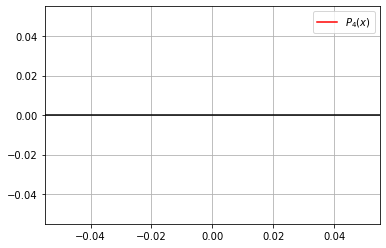

In [9]:
x_data = np.linspace(x[0] - 1, x[-1] + 1, 10000)

fig, axs = plt.subplots()
axs.plot(x_data, Polynom(x_data), label="$P_4(x)$", color="red")
axs.plot(x_data, Lagrange_Polynom(x_data), label="$L_8(x)$", color="green")
plt.scatter(x, y, color='orange', s=30, marker='o')
ax = plt.gca()
# plot X - axis    
ax.axhline(y=0, color='k')
axs.legend()
axs.set(ylim=(8.5, 11))
axs.grid(True)
#plt.savefig("plot_4.1.png", dpi=500)

In [23]:
print("Least Squares method:", Polynom(2019))
print("Lagrange Polynom:", Lagrange_Polynom(2019))
print("Real value:", 10.669)

Least Squares method: 10.664358513779007
Lagrange Polynom: 10.734460835250001
Real value: 10.669
